Confusion Matrix:
 [[11803   764]
 [  101  1332]]


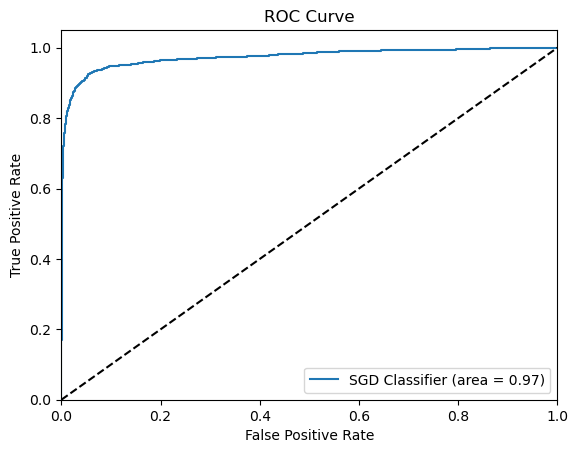

In [10]:
 import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize

# Load MNIST data

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"].astype(int)

# Binary classification: Digit 3 vs. Not 3

y_binary_3 = (y == 3)

# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_3, test_size=0.2, random_state=42)

# Train the SGD classifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train)

# Predictions

y_pred = sgd_clf.predict(X_test)

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)

# ROC Curve

y_score = sgd_clf.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = roc_auc_score(y_test, y_score)

plt.figure()

plt.plot(fpr, tpr, label='SGD Classifier (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend(loc="lower right")

plt.show()

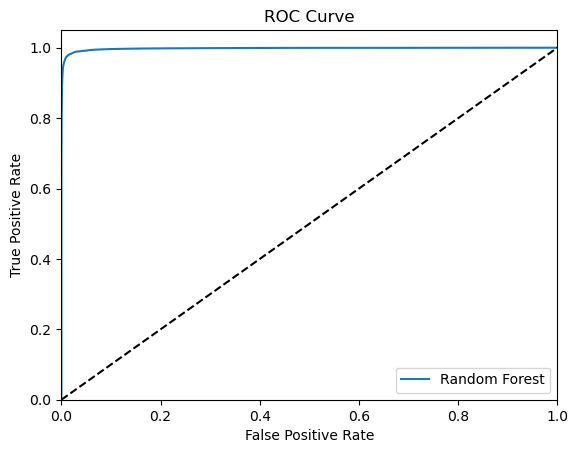

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)
# Binary classification: Digit 2 vs. Not 2
y_binary_2 = (y == 2)
# Train RandomForest classifier with 3-fold cross-validation
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_rf = cross_val_predict(rf_clf, X, y_binary_2, cv=3, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]  # score = proba of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_binary_2, y_scores_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [14]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
# Predictions
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[49726   566]
 [ 1345  4363]]


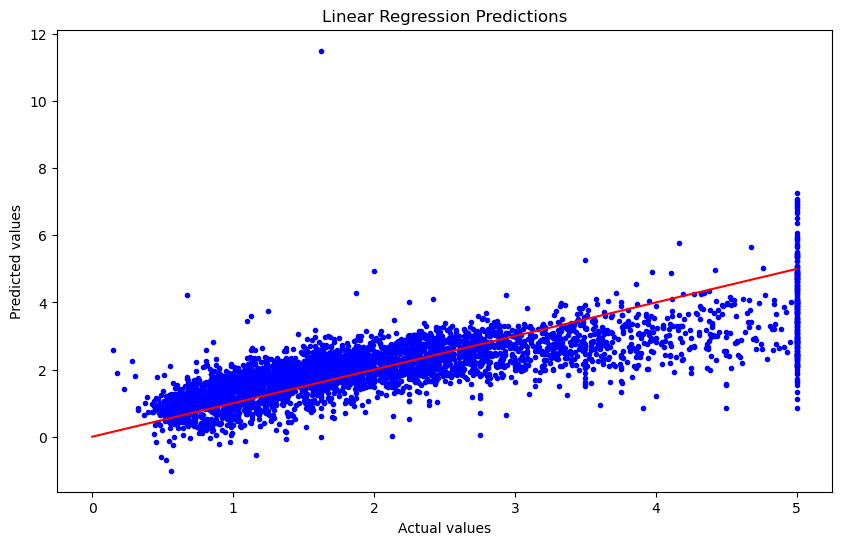

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
housing = fetch_california_housing()
X, y = housing["data"], housing["target"]
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Predictions
y_pred = lin_reg.predict(X_test)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, "b.")
plt.plot([0, 5], [0, 5], "r-")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression Predictions")
plt.show()


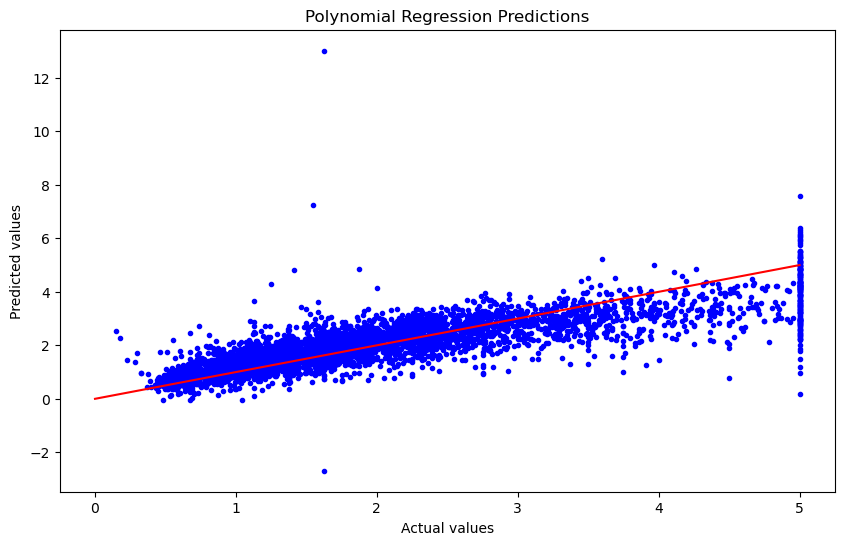

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a polynomial regression model
poly_features = PolynomialFeatures(degree=2, include_bias=False)
lin_reg = LinearRegression()
polynomial_regression = Pipeline([  ("poly_features", poly_features),
    ("lin_reg", lin_reg)])
# Train the model
polynomial_regression.fit(X_train, y_train)
# Predictions
y_pred = polynomial_regression.predict(X_test)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, "b.")
plt.plot([0, 5], [0, 5], "r-")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Polynomial Regression Predictions")
plt.show()


In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris["data"], iris["target"]
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
# Predictions
y_pred = log_reg.predict(X_test)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris["data"], iris["target"]
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
# Predictions
y_pred = svm_clf.predict(X_test)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the digits dataset
digits = load_digits()
X, y = digits["data"], digits["target"]

# Binary classification: Digit 7 vs. Not 7
y_binary_7 = (y == 7)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_7, test_size=0.2, random_state=42, stratify=y_binary_7)

# Create base classifiers
clf1 = SGDClassifier(random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = SVC(kernel='linear', probability=True)

# Create voting classifier
voting_clf = VotingClassifier(
    estimators=[('sgd', clf1), ('rf', clf2), ('svc', clf3)],
    voting='hard')

# Train and evaluate classifiers
for clf in (clf1, clf2, clf3, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# Confusion Matrix for the Voting Classifier
conf_matrix = confusion_matrix(y_test, voting_clf.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)


SGDClassifier 0.9972222222222222
RandomForestClassifier 1.0
SVC 0.9944444444444445
VotingClassifier 1.0
Confusion Matrix:
 [[324   0]
 [  0  36]]
